## About

- performing classification task with TF
- dealing with overfitting thorough early
  stopping callbacks and droupout layers

#### Early stopping

- Keras can automatically stop training
  based on a loss condition on the validation data passed during the model.fit() call

### Droupout layers

- dropout can be added to layers to "turn off" neurons during training to prevent overfitting

 - what acutally happens is
 - Each dropout layer will "drop" a user-defined
   percentage of neuron units in the previous
    layer every batch.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("./DATA/cancer_classification.csv")

In [3]:
# data analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [5]:
# nothing is null so good for us

In [6]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


In [7]:
# for classification task it's always easier
# to see countplot for each labels

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

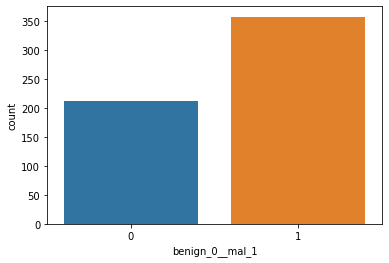

In [8]:
sns.countplot(x='benign_0__mal_1',data=df)

In [9]:
# which tells it's relatively unbalanced 

In [10]:
# but difference is not that extremen though

In [11]:
df.corr()['benign_0__mal_1'].sort_values()

worst concave points      -0.793566
worst perimeter           -0.782914
mean concave points       -0.776614
worst radius              -0.776454
mean perimeter            -0.742636
worst area                -0.733825
mean radius               -0.730029
mean area                 -0.708984
mean concavity            -0.696360
worst concavity           -0.659610
mean compactness          -0.596534
worst compactness         -0.590998
radius error              -0.567134
perimeter error           -0.556141
area error                -0.548236
worst texture             -0.456903
worst smoothness          -0.421465
worst symmetry            -0.416294
mean texture              -0.415185
concave points error      -0.408042
mean smoothness           -0.358560
mean symmetry             -0.330499
worst fractal dimension   -0.323872
compactness error         -0.292999
concavity error           -0.253730
fractal dimension error   -0.077972
symmetry error             0.006522
texture error              0

<AxesSubplot:>

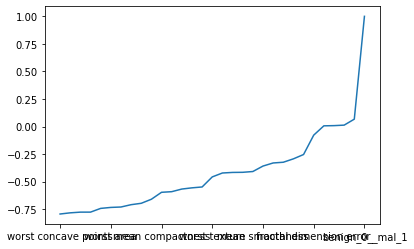

In [12]:
df.corr()['benign_0__mal_1'].sort_values().plot()

<AxesSubplot:>

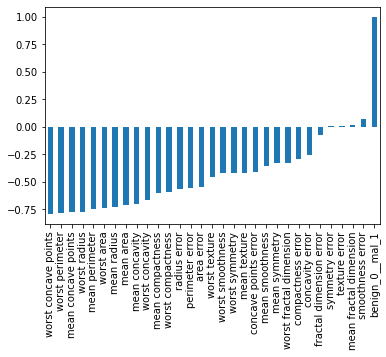

In [13]:
df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')

<AxesSubplot:>

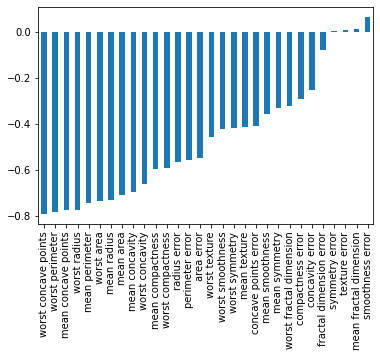

In [14]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

In [15]:
# this gave us what we wanted to compare


In [16]:
# we can see we have pretty highly correlated
# values though negative

In [17]:
# so we should be able to get pretty strong
# predictions from this dataset

<AxesSubplot:>

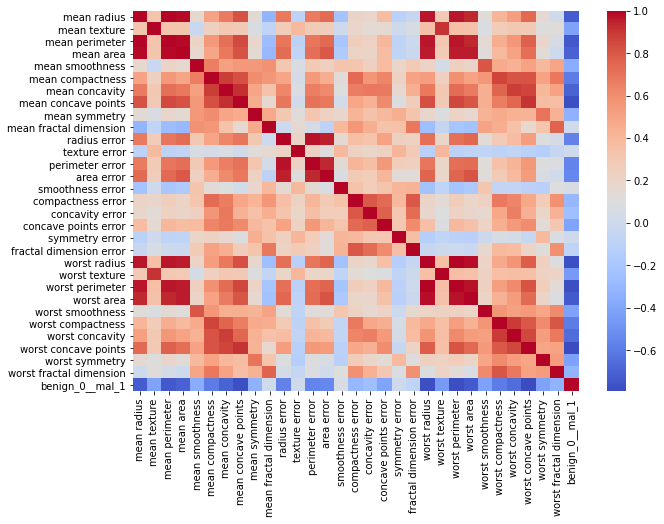

In [18]:
plt.figure(figsize=(10,7))

sns.heatmap(df.corr(),cmap='coolwarm')

In [19]:
X = df.drop('benign_0__mal_1',axis=1).values

y= df['benign_0__mal_1'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
X_train = scaler.fit_transform(X_train)

In [25]:
X_test = scaler.transform(X_test)

### part-2

In [26]:
from tensorflow.keras.models import Sequential


In [27]:
from tensorflow.keras.layers import Dense,Dropout

In [28]:
X_train.shape

(398, 30)

In [29]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# since binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [30]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Epoch 1/600
13/13 [==============================] - 1s 31ms/step - loss: 0.6904 - val_loss: 0.6788
Epoch 2/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6708 - val_loss: 0.6588
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6477 - val_loss: 0.6306
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6054 - val_loss: 0.5925
Epoch 5/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5748 - val_loss: 0.5469
Epoch 6/600
13/13 [==============================] - 0s 5ms/step - loss: 0.5255 - val_loss: 0.4958
Epoch 7/600
13/13 [==============================] - 0s 6ms/step - loss: 0.4778 - val_loss: 0.4453
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4143 - val_loss: 0.3949
Epoch 9/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3759 - val_loss: 0.3496
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3303 - val_loss: 0.3120
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.0428 - val_loss: 0.1430
Epoch 84/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0453 - val_loss: 0.1404
Epoch 85/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0583 - val_loss: 0.1400
Epoch 86/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0339 - val_loss: 0.1414
Epoch 87/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0406 - val_loss: 0.1401
Epoch 88/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0393 - val_loss: 0.1402
Epoch 89/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0569 - val_loss: 0.1415
Epoch 90/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0429 - val_loss: 0.1440
Epoch 91/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0305 - val_loss: 0.1411
Epoch 92/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0314 - val_loss: 0.1434
Epoch 93/600


13/13 [==============================] - 0s 4ms/step - loss: 0.0169 - val_loss: 0.1616
Epoch 165/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0296 - val_loss: 0.1592
Epoch 166/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0303 - val_loss: 0.1582
Epoch 167/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0230 - val_loss: 0.1587
Epoch 168/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0203 - val_loss: 0.1588
Epoch 169/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0223 - val_loss: 0.1588
Epoch 170/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0391 - val_loss: 0.1621
Epoch 171/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0425 - val_loss: 0.1605
Epoch 172/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0233 - val_loss: 0.1609
Epoch 173/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.1627
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0204 - val_loss: 0.1780
Epoch 246/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0252 - val_loss: 0.1774
Epoch 247/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0194 - val_loss: 0.1785
Epoch 248/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0185 - val_loss: 0.1786
Epoch 249/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0227 - val_loss: 0.1804
Epoch 250/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0221 - val_loss: 0.1826
Epoch 251/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0220 - val_loss: 0.1844
Epoch 252/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0296 - val_loss: 0.1851
Epoch 253/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0279 - val_loss: 0.1833
Epoch 254/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0321 - val_loss: 0.1838
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0199 - val_loss: 0.2270
Epoch 327/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0115 - val_loss: 0.2269
Epoch 328/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0137 - val_loss: 0.2265
Epoch 329/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.2274
Epoch 330/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0180 - val_loss: 0.2258
Epoch 331/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0148 - val_loss: 0.2299
Epoch 332/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0136 - val_loss: 0.2291
Epoch 333/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0175 - val_loss: 0.2249
Epoch 334/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0164 - val_loss: 0.2333
Epoch 335/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0239 - val_loss: 0.2235
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.2853
Epoch 408/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0085 - val_loss: 0.2944
Epoch 409/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0105 - val_loss: 0.2876
Epoch 410/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0129 - val_loss: 0.2860
Epoch 411/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0141 - val_loss: 0.2853
Epoch 412/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0201 - val_loss: 0.2936
Epoch 413/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0161 - val_loss: 0.2835
Epoch 414/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0109 - val_loss: 0.2969
Epoch 415/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0089 - val_loss: 0.2888
Epoch 416/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0104 - val_loss: 0.2860
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.3587
Epoch 489/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0080 - val_loss: 0.3711
Epoch 490/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.3606
Epoch 491/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0075 - val_loss: 0.3662
Epoch 492/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.3603
Epoch 493/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0074 - val_loss: 0.3653
Epoch 494/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0065 - val_loss: 0.3671
Epoch 495/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0058 - val_loss: 0.3699
Epoch 496/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0063 - val_loss: 0.3608
Epoch 497/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0098 - val_loss: 0.3688
Epoc

13/13 [==============================] - 0s 4ms/step - loss: 0.0057 - val_loss: 0.4442
Epoch 570/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0070 - val_loss: 0.4561
Epoch 571/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0113 - val_loss: 0.4628
Epoch 572/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0042 - val_loss: 0.4680
Epoch 573/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0069 - val_loss: 0.4551
Epoch 574/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0064 - val_loss: 0.4676
Epoch 575/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0036 - val_loss: 0.4672
Epoch 576/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0028 - val_loss: 0.4742
Epoch 577/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0062 - val_loss: 0.4695
Epoch 578/600
13/13 [==============================] - 0s 4ms/step - loss: 0.0050 - val_loss: 0.4686
Epoc

In [31]:
losses = pd.DataFrame(model.history.history)

In [32]:
losses

,loss,val_loss
0,0.688283,0.678829
1,0.668587,0.658832
2,0.643794,0.630631
3,0.609465,0.592464
4,0.564752,0.546910
...,...,...
595,0.003704,0.492546
596,0.003849,0.496662
597,0.005465,0.489160
598,0.005745,0.495969


<AxesSubplot:>

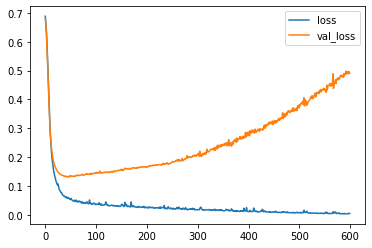

In [33]:
losses.plot()

In [34]:
# a perfect example of overfitting
# spike indicates that we are overfitting
# to our training data clearly

In [35]:
# which says we are simply traiing for too many epochs

- Use Earlystopping

##### based on your valdation loss

In [36]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))

# since binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

- help(EarlyStopping)

  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.

In [38]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',verbose=2,
                          patience=25)

# based on merics to monitor mode will be
# max or min  auto eg :accuracy = max etc 

# patience tells to wait until specied value of epocs
# even after reaching the stopping point 
# bcz of noise that could occur

In [39]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.7184 - val_loss: 0.6880
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6717 - val_loss: 0.6647
Epoch 3/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6499 - val_loss: 0.6403
Epoch 4/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6161 - val_loss: 0.6096
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5836 - val_loss: 0.5702
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5359 - val_loss: 0.5303
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5085 - val_loss: 0.4919
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4589 - val_loss: 0.4528
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4034 - val_loss: 0.4119
Epoch 10/600
13/13 [==============================] - 0s 5ms/step - loss: 0.3735 - val_loss: 0.3729
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.0378 - val_loss: 0.1489
Epoch 00083: early stopping


In [40]:
# it stopped after 82 only cz of early stopping

In [41]:
new_losses = pd.DataFrame(model.history.history)

In [42]:
new_losses

,loss,val_loss
0,0.699651,0.688019
1,0.667729,0.664705
2,0.643836,0.640308
3,0.614542,0.609635
4,0.576117,0.570177
...,...,...
78,0.042174,0.144186
79,0.044157,0.145592
80,0.040889,0.147316
81,0.040810,0.148005


<AxesSubplot:>

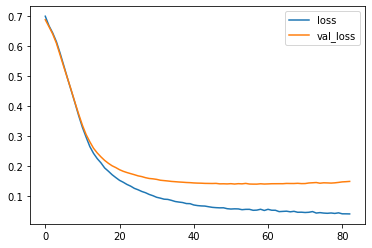

In [43]:
new_losses.plot()

In [44]:
# it's decresing which is fine
# cz we wanted to stop when val_loss start
# increasing

- 3rd thing we can do to avoid overfitting
  is add dropout layers
- which turns off a percentage of neurons
  randomly

In [45]:
from tensorflow.keras.layers import Dropout

In [46]:
model = Sequential()

model.add(Dense(30,activation='relu'))
model.add(Dropout(rate=0.4))

# rate 1 says 100% of neurons are turned off
# for that batch of training the model

model.add(Dense(15,activation='relu'))
model.add(Dropout(rate=0.4))

# since binary classification
model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam')

In [47]:
early_stop = EarlyStopping(monitor='val_loss',
                          mode='min',verbose=2,
                          patience=25)

In [48]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),
         callbacks=[early_stop])

Epoch 1/600
13/13 [==============================] - 0s 11ms/step - loss: 0.6695 - val_loss: 0.6481
Epoch 2/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6545 - val_loss: 0.6260
Epoch 3/600
13/13 [==============================] - 0s 5ms/step - loss: 0.6255 - val_loss: 0.5995
Epoch 4/600
13/13 [==============================] - 0s 4ms/step - loss: 0.6111 - val_loss: 0.5726
Epoch 5/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5927 - val_loss: 0.5472
Epoch 6/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5687 - val_loss: 0.5170
Epoch 7/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5249 - val_loss: 0.4856
Epoch 8/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5113 - val_loss: 0.4598
Epoch 9/600
13/13 [==============================] - 0s 4ms/step - loss: 0.5004 - val_loss: 0.4364
Epoch 10/600
13/13 [==============================] - 0s 4ms/step - loss: 0.4574 - val_loss: 0.4116
Epoch 11

13/13 [==============================] - 0s 4ms/step - loss: 0.0997 - val_loss: 0.1360
Epoch 84/600
13/13 [==============================] - 0s 5ms/step - loss: 0.0824 - val_loss: 0.1358
Epoch 00084: early stopping


In [49]:
# 113 epochs this time

In [50]:
model_loss = pd.DataFrame(model.history.history)

In [51]:
model_loss

,loss,val_loss
0,0.676795,0.648125
1,0.657981,0.625955
2,0.626098,0.599466
3,0.614371,0.572553
4,0.588548,0.547177
...,...,...
79,0.084565,0.134170
80,0.101026,0.135665
81,0.102103,0.133792
82,0.079871,0.136003


<AxesSubplot:>

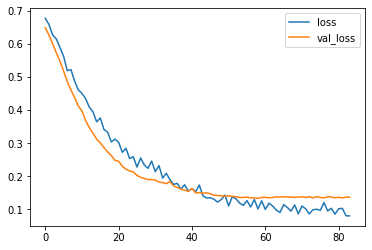

In [52]:
model_loss.plot()

In [53]:
# this is even better(fantastic) behaviour

# both losses are quickly going down

### pedictions

In [54]:
pred = model.predict_classes(X_test)

/home/sam/.local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [55]:
pred

array([[1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
    

In [56]:
from sklearn.metrics import classification_report,confusion_matrix

In [57]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        66
           1       0.97      0.98      0.98       105

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



In [58]:
print(confusion_matrix(y_test,pred
                      ))

[[ 63   3]
 [  2 103]]


In [60]:
# which says our model only mis-classify
# only three items incorrectly !!!